# Problem 2

In this Jupyter notebook, we visualize how HMMs work. This visualization corresponds to problem 2 in set 6.

Assuming your HMM module is complete and saved at the correct location, you can simply run all cells in the notebook without modification.

In [2]:
import os
import numpy as np
from IPython.display import HTML
import json
from HMM import unsupervised_HMM
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission
)
import re
import sys

In [ ]:
# Saving syllables info in dictionary
syll = {}
f = open("Syllable_dictionary.txt", "r")
lines = f.readlines() 

# Strips the newline character 
for line in lines: 
    print(line.strip()) 
    print("Line{}: {}".format(count, line.strip())) 


with open('syllables.json', 'w') as fp:
    json.dump(data, fp)

In [7]:
import re

In [52]:
# /[a-zA-Z]+/g

word = "Hello mi name is maya's"
he = re.sub(r"^[a-zA-Z]", "", word).lower()
#word = re.sub(r'/[a-zA-Z]+\D+/g', '', word).lower()
hie = re.sub(r'/\D/', '', word).lower()


In [3]:
text = open(os.path.join(os.getcwd(), 'data_Shakespeare/shakespeare.txt')).read()
obs, obs_map = parse_observations(text)

## Visualization of the dataset

We will be using the Constitution as our dataset. First, we visualize the entirety of the Constitution as a wordcloud:

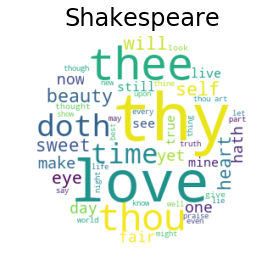

In [3]:
text = open(os.path.join(os.getcwd(), 'data_Shakespeare/shakespeare.txt')).read()
wordcloud = text_to_wordcloud(text, title='Shakespeare')

## Training an HMM

Now we train an HMM on our dataset. We use 10 hidden states and train over 100 iterations:

In [6]:
obs, obs_map = parse_observations(text)
hmm8 = unsupervised_HMM(obs, 10, 100)

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100


## Part G: Visualization of the sparsities of A and O

We can visualize the sparsities of the A and O matrices by treating the matrix entries as intensity values and showing them as images. What patterns do you notice?

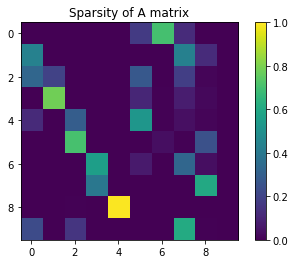

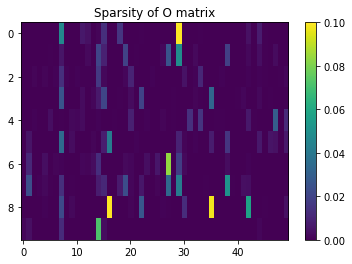

In [59]:
visualize_sparsities(hmm8, O_max_cols=50)

## Generating a sample sentence

As you have already seen, an HMM can be used to generate sample sequences based on the given dataset. Run the cell below to show a sample sentence based on the Constitution.

In [7]:
print('Sample Sentence:\n====================')
print(sample_sentence(hmm8, obs_map, n_words=10))

Sample Sentence:
My won sight again love dreading shape we me find...


In [8]:
# Writing sonnet 
for i in range(0, 14):    
    print(sample_sentence(hmm8, obs_map, n_words=8))

Guess my long-lived love's so your my thy...
Whether politic well doth been and thou me...
While i art joy love but my added...
Each stelled love bright but love save elements...
Thine in love he wound need in the...
A 'not o as but abuse sins will...
Up am sadly that before grounded on shame...
Assure semblance heart might i drawn let me...
Thee of east counterfeit night of foist ornament...
Although but my prize sole mine brow back...
I alone read no might not not aside...
Stores to win a due poor will to...
Than only the soul nor lie delight i...
I our my my in eye blind grounded...


## Part H: Using varying numbers of hidden states

Using different numbers of hidden states can lead to different behaviours in the HMMs. Below, we train several HMMs with 1, 2, 4, and 16 hidden states, respectively. What do you notice about their emissions? How do these emissions compare to the emission above?

In [40]:
a = np.array([[1,2,3], [4,5,6], [7,8,9]])
a[:,0]

array([1, 4, 7])

# For Generating Rhymes 

In [83]:
def generate_emission1(self, M, seed):
        '''
        Generates an emission of length M, assuming that the starting state
        is chosen uniformly at random. 

        Arguments:
            M:          Length of the emission to generate.

        Returns:
            emission:   The randomly generated emission as a list.

            states:     The randomly generated states as a list.
        '''
        
        #O: The (i, j)^th element is the probability of
        # emitting observation j given state i.
        O = np.array(self.O)
        emission = []
        emission.append(seed)
       
        # generate first state given this emission 
        col_states = O[:, seed]
   
    
        col_sum = sum(col_states)
        # normalize the probabilities 
        col_states *= (1.0 / col_sum)
        if len(col_states) == 1:
            col_states = [1]
        state = np.random.choice(len(col_states), p=col_states)
        
        
        states = []
        for t in range(M-1):
            # Append state.
            states.append(state)

            # Sample next observation.
            rand_var = random.uniform(0, 1)
            next_obs = 0

            while rand_var > 0:
                rand_var -= self.O[state][next_obs]
                next_obs += 1

            next_obs -= 1
            emission.insert(0, next_obs)

            # Sample next state.
            rand_var = random.uniform(0, 1)
            next_state = 0

            while rand_var > 0:
                rand_var -= self.A[state][next_state]
                next_state += 1

            next_state -= 1
            state = next_state

        return emission, states
    
    
def obs_map_reverser1(obs_map):
    obs_map_r = {}

    for key in obs_map:
        obs_map_r[obs_map[key]] = key

    return obs_map_r

def sample_sentence1(hmm, obs_map, seed, n_words=100):
    # Get reverse map.
    seed_idx = obs_map[seed]
    obs_map_r = obs_map_reverser1(obs_map)

    # obs_map is of the form key=word: val=identifier
    # Pass the identifier 

    
    # Sample and convert sentence.
    emission, states = generate_emission1(hmm, n_words, seed_idx)
    sentence = [obs_map_r[i] for i in emission]

    return ' '.join(sentence).capitalize() + '...'

In [69]:
hmm1 = unsupervised_HMM(obs, 1, 100)
print('\nSample Sentence:\n====================')
print(sample_sentence1(hmm1, obs_map,"bright", n_words=10))

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100

Sample Sentence:
[1.]
Bright and memory indeed verses is war them of thou...


In [68]:
print(sample_sentence1(hmm1, obs_map, n_words=25))

[1.]
Bright marjoram in within doth that let whilst truth state more banks steal sweet do be as long despite what your difference world heart though...


In [76]:
hmm4 = unsupervised_HMM(obs, 4, 100)

In [85]:
print(sample_sentence1(hmm4, obs_map, "bright", n_words=10))
print(sample_sentence1(hmm4, obs_map, "night", n_words=10))
print(sample_sentence1(hmm4, obs_map, "old", n_words=10))
print(sample_sentence1(hmm4, obs_map, "cold", n_words=10))
print(sample_sentence1(hmm4, obs_map, "meet", n_words=10))
print(sample_sentence1(hmm4, obs_map, "sweet", n_words=10))

Abuse was come kind the eyes no leisure and bright...
To beauteous taker loathsome will i such so world night...
Not would that excuse thy to from thy gems old...
That delight your to releasing but graves thy woe cold...
Do thee deaths so love thy worthless the thou meet...
Is times invention that all fingers love drink shames sweet...


In [10]:
# Testing 4-hidden-states HMM poem generation 
for i in range(0, 14):    
    print(sample_sentence(hmm4, obs_map, n_words=8))

Lust ugly their but to and age's so...
Pity my shamed thinking first thou you sake...
Shall in beyond thee the made eye all...
Be untainted but more this thee and for...
Lace spite on he love had she so...
His but tend me why my with do...
Drawn of shows eye of where let each...
That make youth that boy thy in speak...
All-tyrant the thine your me and were by...
Doom of stormy heart and strength without such...
That to my and my to help life...
Well i sound is sky thief torture the...
It name sweetest one to threescore wished picture...
By self-substantial descriptions too like long their she...


In [67]:
hmm16 = unsupervised_HMM(obs, 16, 100)
print('\nSample Sonnet:\n====================')

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100

Sample Sentence:
And is your plague forbear must all my...
Nor it eyes for none presentabsent thy beauty...
Hate mock to fortune antiquity and doth bear...
Bear wards thy will thee fault pursuit assured...
Or yet to of counting cool thorns be...
Such am thoughts thee cunning by the gives...
With tires man can divided lame like general...
Me is more barren waiting as make inconstant...
Slay watchman but me by growing thine see...
Man name it mistaking my self at that...
Believe in beauty presents song be to that...
So pale replete have swift thy gift yours...
Straight are this place outlive prescriptions are to...
Is conquest me next near who esteem give...


In [91]:
# Writing sonnet 
for i in range(0, 14):    
    print(sample_sentence(hmm16, obs_map, n_words=8))
#print(sample_sentence(hmm16, obs_map, n_words=25))

Either graces this winds fair to hath my...
That prove in so seeing from i ending...
Divide their his most art false and eclipse...
To knew fresh aspect more life decay himself...
Like like of sweet that and up from...
Among in they do allow seem your where...
And and how with stand with mine say...
Do my heart still and strangely even and...
Are old seeming less making new scorned tombs...
Even merit which form to debarred thousand cherubins...
With dun so perfection is one was i...
So when why that is come forbid looks...
For my wished spirits to doth presence do...
Privilage sullied i or heaven to griefs and...


In [78]:
hmm20 = unsupervised_HMM(obs, 20, 100)
print('\nSample Sonnet, 20 Latent States:\n====================')
# Writing sonnet 
for i in range(0, 14):    
    print(sample_sentence(hmm20, obs_map, n_words=10))

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100

Sample Sonnet, 20 Latent States:
And that so of fuel dial wilt before beauty to...
Nothing onwards worth brought to former thoughts not conscience be...
For keep be bending the remembrance with thine for he...
The thou created rank thee my beast thy love being...
Neercloying grave annexed make pace are base to th is...
Again with hides the expired of after powers compare i...
But eyes in far defect kept his hell mend up...
Breast doth it i with the but rhyme by shalt...
Ill thou so times one of profaned resort and many...
Shows a shape nor what the heals other of you...
Arts that hold now not compare grace woo of a...
Love then he thine fortify nature saturn nimble tongue where...
Sweet leave by their minds decays his as heard of...
Thy my pleasure out proud and and decease every thy...


In [105]:
# Writing sonnet 
for i in range(0, 14):    
    print(sample_sentence(hmm20, obs_map, n_words=8))

Willing than canopy the day to great your...
Prize that but you travels beauty separable aught...
In his i find perjured then forth not...
Poor the scorn of thy head and by...
Nothing thy form it to the review in...
And since you have the sun wouldst of...
When the suspect in faults shalt those doth...
Your mothers sing of my knife canst of...
Praise name by adjunct thing quill loves of...
If i to turn perfumed the story one...
All my love but confined those here constant...
No my part wide ill abuse thy mayst...
Ceremony my hand on far closet grace a...
All with dote a mountain and deserves an...


## Part I: Visualizing the wordcloud of each state

Below, we visualize each state as a wordcloud by sampling a large emission from the state:

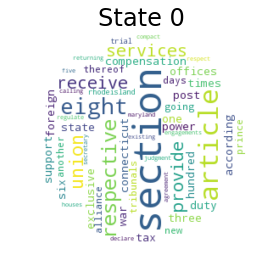

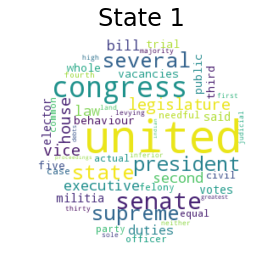

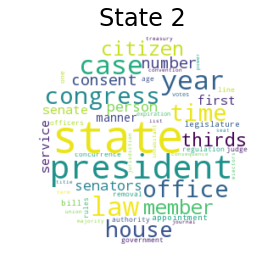

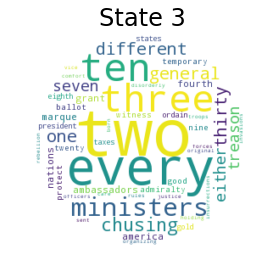

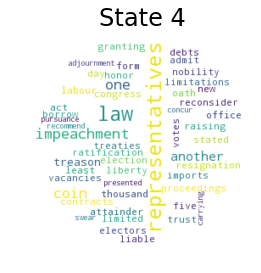

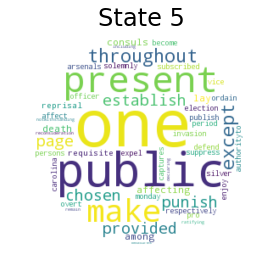

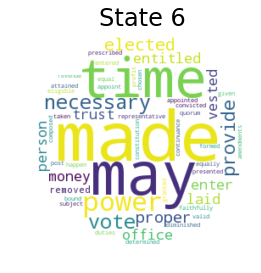

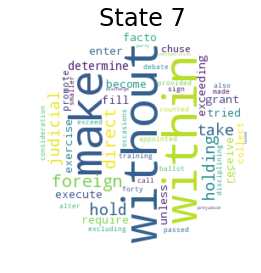

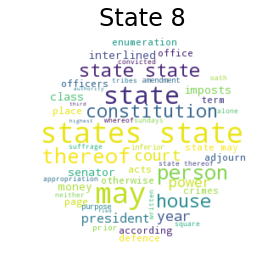

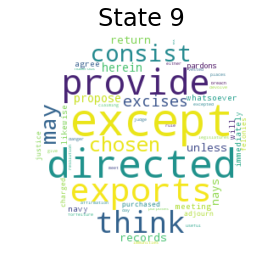

In [10]:
wordclouds = states_to_wordclouds(hmm8, obs_map)

## Visualizing the process of an HMM generating an emission

The visualization below shows how an HMM generates an emission. Each state is shown as a wordcloud on the plot, and transition probabilities between the states are shown as arrows. The darker an arrow, the higher the transition probability.

At every frame, a transition is taken and an observation is emitted from the new state. A red arrow indicates that the transition was just taken. If a transition stays at the same state, it is represented as an arrowhead on top of that state.

Use fullscreen for a better view of the process.

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "



Animating...


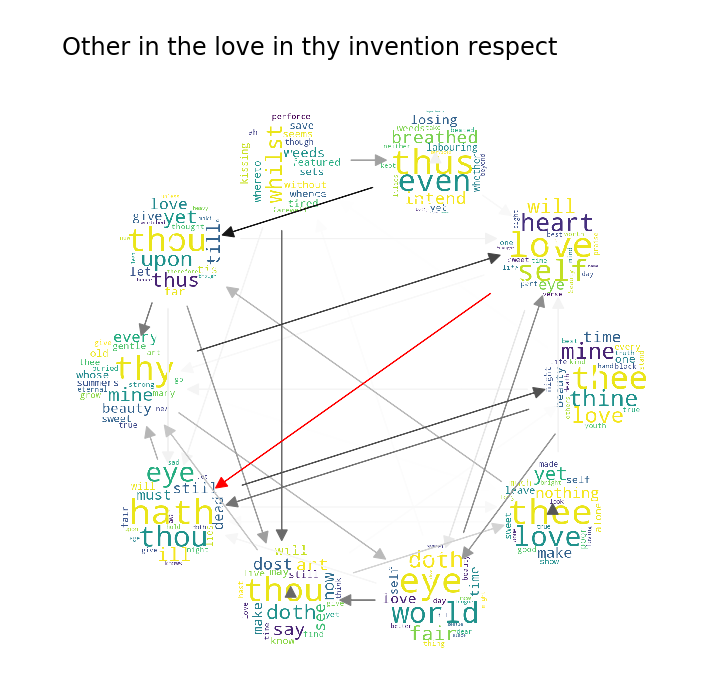

In [106]:
anim = animate_emission(hmm8, obs_map, M=8)
HTML(anim.to_html5_video())

# Training Character-Based LSTM 

In [235]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
from keras.layers import Lambda

In [236]:
text = open(os.path.join(os.getcwd(), 'data_Shakespeare/shakespeare.txt')).read()

In [77]:
 # Convert text to dataset.
lines = [line.split() for line in text.split('\n') if line.split()]
allwords = []

for line in lines:
    obs_elem = []

    for word in line:
        word = word.strip()
        if word.isdigit() == False:
            # through out all digits
            word = re.sub(r'[^\w\?\-\'\,]', '', word).lower() 
            allwords.append(word)


In [78]:
# Saving stripped version as textfile
with open('ShakespeareChars3.txt', 'w') as f:
    for words in allwords:
        f.write('%s ' % words)
        
f.close()        

In [79]:
allwords

['from',
 'fairest',
 'creatures',
 'we',
 'desire',
 'increase,',
 'that',
 'thereby',
 "beauty's",
 'rose',
 'might',
 'never',
 'die,',
 'but',
 'as',
 'the',
 'riper',
 'should',
 'by',
 'time',
 'decease,',
 'his',
 'tender',
 'heir',
 'might',
 'bear',
 'his',
 'memory',
 'but',
 'thou',
 'contracted',
 'to',
 'thine',
 'own',
 'bright',
 'eyes,',
 "feed'st",
 'thy',
 "light's",
 'flame',
 'with',
 'self-substantial',
 'fuel,',
 'making',
 'a',
 'famine',
 'where',
 'abundance',
 'lies,',
 'thy',
 'self',
 'thy',
 'foe,',
 'to',
 'thy',
 'sweet',
 'self',
 'too',
 'cruel',
 'thou',
 'that',
 'art',
 'now',
 'the',
 "world's",
 'fresh',
 'ornament,',
 'and',
 'only',
 'herald',
 'to',
 'the',
 'gaudy',
 'spring,',
 'within',
 'thine',
 'own',
 'bud',
 'buriest',
 'thy',
 'content,',
 'and',
 'tender',
 'churl',
 "mak'st",
 'waste',
 'in',
 'niggarding',
 'pity',
 'the',
 'world,',
 'or',
 'else',
 'this',
 'glutton',
 'be,',
 'to',
 'eat',
 'the',
 "world's",
 'due,',
 'by',
 'the

In [239]:
filename = 'ShakespeareChars1.txt'
raw_text = open(filename, 'r', encoding='utf-8').read()
raw_text = raw_text.lower()

In [240]:
# create mapping of unique chars to integers
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))

In [241]:
n_chars = len(raw_text)
n_vocab = len(chars)
print("Total Characters: ", n_chars)
print("Total Vocab: ", n_vocab)

Total Characters:  92978
Total Vocab:  31


In [242]:
X = []
Y = []

In [243]:
# prepare the dataset of input to output pairs encoded as integers
seq_length = 40
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 3):
    seq_in = raw_text[i:i + seq_length]
    seq_out = raw_text[i + seq_length]
    dataX.append([char_to_int[char] for char in seq_in])
    dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print("Total Patterns: ", n_patterns)

Total Patterns:  30980


In [244]:
# reshape X to be [samples, time steps, features]
#X = np.reshape(dataX, (n_patterns, seq_length, 1))

X = np_utils.to_categorical(dataX)
# one hot encode the output variable
y = np_utils.to_categorical(dataY)

# LSTM with Temperature

In [245]:
# For temperature parameter: model.add(Lambda(lambda x: x / temp_val)) 
model = Sequential()
model.add(LSTM(150, input_shape=(X.shape[1], X.shape[2])))

model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [246]:
# Check-pointing the training to allow us to pinpoint the lowest-loss model
filepath="weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [247]:
# Training
model.fit(X, y, epochs=50, batch_size=16, callbacks=callbacks_list)

Epoch 1/50
30980/30980 [==============================] - 66s 2ms/step - loss: 2.4021 - acc: 0.3098

Epoch 00001: loss improved from inf to 2.40213, saving model to weights-improvement-01-2.4021.hdf5
Epoch 2/50
30980/30980 [==============================] - 73s 2ms/step - loss: 2.0173 - acc: 0.4023

Epoch 00002: loss improved from 2.40213 to 2.01732, saving model to weights-improvement-02-2.0173.hdf5
Epoch 3/50
30980/30980 [==============================] - 73s 2ms/step - loss: 1.8702 - acc: 0.4368

Epoch 00003: loss improved from 2.01732 to 1.87018, saving model to weights-improvement-03-1.8702.hdf5
Epoch 4/50
30980/30980 [==============================] - 65s 2ms/step - loss: 1.7734 - acc: 0.4558

Epoch 00004: loss improved from 1.87018 to 1.77342, saving model to weights-improvement-04-1.7734.hdf5
Epoch 5/50
30980/30980 [==============================] - 66s 2ms/step - loss: 1.6941 - acc: 0.4781

Epoch 00005: loss improved from 1.77342 to 1.69405, saving model to weights-improvement

KeyboardInterrupt: 

In [217]:
# Recovering the lowest-loss weights 
filename = "weights-improvement-98-0.6485.hdf5"
model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [218]:
int_to_char = dict((i, c) for i, c in enumerate(chars))

In [225]:
pattern = []
# Converting seed to a beginning pattern

seed = "shall i compare thee to a summer's day? "
#“shall i compare thee to a summer’s day?\n”

for c in seed:
    pattern.append(char_to_int[c])

# LSTM Sentence Generation 

In [226]:
print("Seed:")
print("\"", ''.join([int_to_char[value] for value in pattern]), "\"")

Seed:
" shall i compare thee to a summer's day?  "


In [220]:
#start = np.random.randint(0, len(dataX)-1)
#pattern = dataX[start]
print("Seed:")
print("\"", ''.join([int_to_char[value] for value in pattern]), "\"")

Seed:
" whose shadow shadows doth make bright ho "


In [229]:

# Starting seed:  shall i compare thee to a summers day


# weights-improvement-87-0.6483.hdf5 (the file you want)
# loss improved from 0.67607 to 0.64828, saving model to weights-improvement-87-0.6483.hdf5
# epoch: 87


# generate characters
for i in range(400):
    x = np.reshape(pattern, (1, len(pattern), 1))
    x = x / float(n_vocab)
    prediction = model.predict(x, verbose=0)
    index = np.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[value] for value in pattern]
    sys.stdout.write(result)
    pattern.append(index)
    pattern = pattern[1:len(pattern)]

eeatees dout ary brool n shlle to aeme  fo  tual aootr ii  yhi foottens baaet, lnse,toatket  eede,,blat,,ard braan bwdtlot ban  rhr hoee aadi fo whbr souuru,srsnn honnnt,tolnt,de  nr hes shy pilf fi a an cn oueeu hiant oo heaet s  il gu suue  ldne tee  anlly tft wher mts sy toaf thin oooes' ooeme the  nllly toatoess to mhee  th thald  toer   edddddddeee,aee  yyer heerte  ooieo  aod geak  uoan auat

In [234]:
for e in dataX:
    
    for i in e:
        print(int_to_char[i], end="")
    print('\n')

from fairest creatures we desire increas

st creatures we desire increase, that th

es we desire increase, that thereby beau

re increase, that thereby beauty's rose 

e, that thereby beauty's rose might neve

ereby beauty's rose might never die, but

ty's rose might never die, but as the ri

might never die, but as the riper should

r die, but as the riper should by time d

 as the riper should by time decease, hi

per should by time decease, his tender h

 by time decease, his tender heir might 

ecease, his tender heir might bear his m

s tender heir might bear his memory but 

eir might bear his memory but thou contr

bear his memory but thou contracted to t

emory but thou contracted to thine own b

thou contracted to thine own bright eyes

acted to thine own bright eyes, feed'st 

hine own bright eyes, feed'st thy light'

right eyes, feed'st thy light's flame wi

, feed'st thy light's flame with self-su

thy light's flame with self-substantial 

s flame with self-substantial fuel

ee to be gone, what acceptable audit can

one, what acceptable audit canst thou le

acceptable audit canst thou leave? thy u

 audit canst thou leave? thy unused beau

st thou leave? thy unused beauty must be

ave? thy unused beauty must be tombed wi

nused beauty must be tombed with thee, w

ty must be tombed with thee, which used 

 tombed with thee, which used lives th' 

th thee, which used lives th' executor t

hich used lives th' executor to be those

lives th' executor to be those hours tha

executor to be those hours that with gen

o be those hours that with gentle work d

 hours that with gentle work did frame t

t with gentle work did frame the lovely 

tle work did frame the lovely gaze where

id frame the lovely gaze where every eye

he lovely gaze where every eye doth dwel

gaze where every eye doth dwell will pla

 every eye doth dwell will play the tyra

 doth dwell will play the tyrants to the

l will play the tyrants to the very same

y the tyrants to the very same, an

whose speechless song being many, seemin

chless song being many, seeming one, sin

g being many, seeming one, sings this to

ny, seeming one, sings this to thee, 'th

g one, sings this to thee, 'thou single 

gs this to thee, 'thou single wilt prove

 thee, 'thou single wilt prove none' is 

ou single wilt prove none' is it for fea

wilt prove none' is it for fear to wet a

 none' is it for fear to wet a widow's e

it for fear to wet a widow's eye, that t

r to wet a widow's eye, that thou consum

 widow's eye, that thou consum'st thy se

ye, that thou consum'st thy self in sing

hou consum'st thy self in single life? a

'st thy self in single life? ah, if thou

lf in single life? ah, if thou issueless

le life? ah, if thou issueless shalt hap

h, if thou issueless shalt hap to die, t

 issueless shalt hap to die, the world w

 shalt hap to die, the world will wail t

 to die, the world will wail thee like a

he world will wail thee like a makeless 

ill wail thee like a makeless wife

efence save breed to brave him, when he 

e breed to brave him, when he takes thee

 brave him, when he takes thee hence o t

, when he takes thee hence o that you we

takes thee hence o that you were your se

 hence o that you were your self, but lo

hat you were your self, but love you are

re your self, but love you are no longer

lf, but love you are no longer yours, th

ve you are no longer yours, than you you

 no longer yours, than you your self her

 yours, than you your self here live, ag

an you your self here live, against this

r self here live, against this coming en

e live, against this coming end you shou

ainst this coming end you should prepare

 coming end you should prepare, and your

d you should prepare, and your sweet sem

ld prepare, and your sweet semblance to 

, and your sweet semblance to some other

 sweet semblance to some other give so s

blance to some other give so should that

some other give so should that beauty wh

 give so should that beauty which 

 is but as a tomb which hides your life,

 a tomb which hides your life, and shows

ich hides your life, and shows not half 

your life, and shows not half your parts

 and shows not half your parts if i coul

 not half your parts if i could write th

your parts if i could write the beauty o

 if i could write the beauty of your eye

d write the beauty of your eyes, and in 

e beauty of your eyes, and in fresh numb

f your eyes, and in fresh numbers number

s, and in fresh numbers number all your 

fresh numbers number all your graces, th

ers number all your graces, the age to c

 all your graces, the age to come would 

graces, the age to come would say this p

e age to come would say this poet lies, 

ome would say this poet lies, such heave

say this poet lies, such heavenly touche

oet lies, such heavenly touches ne'er to

such heavenly touches ne'er touched eart

nly touches ne'er touched earthly faces 

s ne'er touched earthly faces so should 

uched earthly faces so should my p

th rehearse, making a couplement of prou

e, making a couplement of proud compare 

a couplement of proud compare with sun a

nt of proud compare with sun and moon, w

d compare with sun and moon, with earth 

with sun and moon, with earth and sea's 

nd moon, with earth and sea's rich gems 

ith earth and sea's rich gems with april

and sea's rich gems with april's first-b

rich gems with april's first-born flower

with april's first-born flowers and all 

's first-born flowers and all things rar

orn flowers and all things rare, that he

s and all things rare, that heaven's air

things rare, that heaven's air in this h

e, that heaven's air in this huge rondur

aven's air in this huge rondure hems o l

 in this huge rondure hems o let me true

uge rondure hems o let me true in love b

e hems o let me true in love but truly w

et me true in love but truly write, and 

 in love but truly write, and then belie

ut truly write, and then believe me, my 

rite, and then believe me, my love

themselves their pride lies buried, for 

 their pride lies buried, for at a frown

de lies buried, for at a frown they in t

ried, for at a frown they in their glory

at a frown they in their glory die the p

 they in their glory die the painful war

heir glory die the painful warrior famou

 die the painful warrior famoused for fi

ainful warrior famoused for fight, after

rior famoused for fight, after a thousan

sed for fight, after a thousand victorie

ght, after a thousand victories once foi

 a thousand victories once foiled, is fr

d victories once foiled, is from the boo

s once foiled, is from the book of honou

led, is from the book of honour razed qu

om the book of honour razed quite, and a

k of honour razed quite, and all the res

r razed quite, and all the rest forgot f

ite, and all the rest forgot for which h

ll the rest forgot for which he toiled t

t forgot for which he toiled then happy 

or which he toiled then happy i that lov

e toiled then happy i that love an

ngs when to the sessions of sweet silent

o the sessions of sweet silent thought, 

ions of sweet silent thought, i summon u

eet silent thought, i summon up remembra

 thought, i summon up remembrance of thi

i summon up remembrance of things past, 

p remembrance of things past, i sigh the

nce of things past, i sigh the lack of m

ngs past, i sigh the lack of many a thin

i sigh the lack of many a thing i sought

 lack of many a thing i sought, and with

any a thing i sought, and with old woes 

g i sought, and with old woes new wail m

, and with old woes new wail my dear tim

 old woes new wail my dear time's waste 

new wail my dear time's waste then can i

y dear time's waste then can i drown an 

e's waste then can i drown an eye unused

then can i drown an eye unused to flow f

 drown an eye unused to flow for preciou

eye unused to flow for precious friends 

 to flow for precious friends hid in dea

or precious friends hid in death's datel

s friends hid in death's dateless 

ls the wound, and cures not the disgrace

nd, and cures not the disgrace nor can t

res not the disgrace nor can thy shame g

e disgrace nor can thy shame give physic

 nor can thy shame give physic to my gri

hy shame give physic to my grief, though

ive physic to my grief, though thou repe

 to my grief, though thou repent, yet i 

ef, though thou repent, yet i have still

 thou repent, yet i have still the loss,

nt, yet i have still the loss, th' offen

have still the loss, th' offender's sorr

 the loss, th' offender's sorrow lends b

 th' offender's sorrow lends but weak re

der's sorrow lends but weak relief to hi

ow lends but weak relief to him that bea

ut weak relief to him that bears the str

lief to him that bears the strong offenc

m that bears the strong offence's cross 

rs the strong offence's cross ah but tho

ong offence's cross ah but those tears a

e's cross ah but those tears are pearl w

ah but those tears are pearl which thy l

se tears are pearl which thy love 

mes more in worth than those old nine wh

n worth than those old nine which rhymer

an those old nine which rhymers invocate

ld nine which rhymers invocate, and he t

ich rhymers invocate, and he that calls 

s invocate, and he that calls on thee, l

, and he that calls on thee, let him bri

hat calls on thee, let him bring forth e

on thee, let him bring forth eternal num

et him bring forth eternal numbers to ou

ng forth eternal numbers to outlive long

ternal numbers to outlive long date if m

bers to outlive long date if my slight m

tlive long date if my slight muse do ple

 date if my slight muse do please these 

y slight muse do please these curious da

use do please these curious days, the pa

ase these curious days, the pain be mine

curious days, the pain be mine, but thin

ys, the pain be mine, but thine shall be

in be mine, but thine shall be the prais

, but thine shall be the praise o how th

e shall be the praise o how thy worth wi

 the praise o how thy worth with m

sight, mine eye, my heart thy picture's 

e eye, my heart thy picture's sight woul

heart thy picture's sight would bar, my 

picture's sight would bar, my heart, min

sight would bar, my heart, mine eye the 

d bar, my heart, mine eye the freedom of

heart, mine eye the freedom of that righ

e eye the freedom of that right, my hear

freedom of that right, my heart doth ple

 that right, my heart doth plead that th

t, my heart doth plead that thou in him 

t doth plead that thou in him dost lie, 

ad that thou in him dost lie, a closet n

ou in him dost lie, a closet never pierc

dost lie, a closet never pierced with cr

a closet never pierced with crystal eyes

ever pierced with crystal eyes but the d

ed with crystal eyes but the defendant d

ystal eyes but the defendant doth that p

 but the defendant doth that plea deny, 

efendant doth that plea deny, and says i

oth that plea deny, and says in him thy 

lea deny, and says in him thy fair appea

and says in him thy fair appearanc

s with a groan, more sharp to me than sp

roan, more sharp to me than spurring to 

 sharp to me than spurring to his side, 

me than spurring to his side, for that s

urring to his side, for that same groan 

his side, for that same groan doth put t

for that same groan doth put this in my 

ame groan doth put this in my mind, my g

doth put this in my mind, my grief lies 

his in my mind, my grief lies onward and

mind, my grief lies onward and my joy be

rief lies onward and my joy behind thus 

onward and my joy behind thus can my lov

 my joy behind thus can my love excuse t

hind thus can my love excuse the slow of

can my love excuse the slow offence, of 

e excuse the slow offence, of my dull be

he slow offence, of my dull bearer, when

fence, of my dull bearer, when from thee

my dull bearer, when from thee i speed, 

arer, when from thee i speed, from where

 from thee i speed, from where thou art,

 i speed, from where thou art, why shoul

from where thou art, why should i 

onry, nor mars his sword, nor war's quic

mars his sword, nor war's quick fire sha

word, nor war's quick fire shall burn th

war's quick fire shall burn the living r

k fire shall burn the living record of y

ll burn the living record of your memory

e living record of your memory 'gainst d

ecord of your memory 'gainst death, and 

our memory 'gainst death, and all-oblivi

 'gainst death, and all-oblivious enmity

eath, and all-oblivious enmity shall you

all-oblivious enmity shall you pace fort

ous enmity shall you pace forth, your pr

 shall you pace forth, your praise shall

 pace forth, your praise shall still fin

h, your praise shall still find room, ev

aise shall still find room, even in the 

 still find room, even in the eyes of al

d room, even in the eyes of all posterit

en in the eyes of all posterity that wea

eyes of all posterity that wear this wor

l posterity that wear this world out to 

y that wear this world out to the ending

r this world out to the ending doo

ght, and all those beauties whereof now 

ll those beauties whereof now he's king 

eauties whereof now he's king are vanish

ereof now he's king are vanishing, or va

he's king are vanishing, or vanished out

are vanishing, or vanished out of sight,

ing, or vanished out of sight, stealing 

nished out of sight, stealing away the t

 of sight, stealing away the treasure of

 stealing away the treasure of his sprin

away the treasure of his spring for such

reasure of his spring for such a time do

 his spring for such a time do i now for

g for such a time do i now fortify again

 a time do i now fortify against confoun

 i now fortify against confounding age's

tify against confounding age's cruel kni

st confounding age's cruel knife, that h

ding age's cruel knife, that he shall ne

 cruel knife, that he shall never cut fr

fe, that he shall never cut from memory 

e shall never cut from memory my sweet l

ver cut from memory my sweet love's beau

om memory my sweet love's beauty, 

ived and died as flowers do now, before 

ied as flowers do now, before these bast

wers do now, before these bastard signs 

w, before these bastard signs of fair we

these bastard signs of fair were born, o

ard signs of fair were born, or durst in

of fair were born, or durst inhabit on a

re born, or durst inhabit on a living br

r durst inhabit on a living brow before 

habit on a living brow before the golden

 living brow before the golden tresses o

ow before the golden tresses of the dead

the golden tresses of the dead, the righ

 tresses of the dead, the right of sepul

f the dead, the right of sepulchres, wer

, the right of sepulchres, were shorn aw

t of sepulchres, were shorn away, to liv

chres, were shorn away, to live a second

e shorn away, to live a second life on s

ay, to live a second life on second head

e a second life on second head, ere beau

 life on second head, ere beauty's dead 

econd head, ere beauty's dead fleece mad

, ere beauty's dead fleece made an

where my body is, and live no more to sh

ody is, and live no more to shame nor me

d live no more to shame nor me, nor you 

more to shame nor me, nor you for i am s

ame nor me, nor you for i am shamed by t

, nor you for i am shamed by that which 

for i am shamed by that which i bring fo

hamed by that which i bring forth, and s

hat which i bring forth, and so should y

i bring forth, and so should you, to lov

rth, and so should you, to love things n

o should you, to love things nothing wor

ou, to love things nothing worth that ti

e things nothing worth that time of year

othing worth that time of year thou mays

th that time of year thou mayst in me be

me of year thou mayst in me behold, when

 thou mayst in me behold, when yellow le

t in me behold, when yellow leaves, or n

hold, when yellow leaves, or none, or fe

 yellow leaves, or none, or few do hang 

aves, or none, or few do hang upon those

one, or few do hang upon those boughs wh

w do hang upon those boughs which 

a worthless boat, he of tall building, a

s boat, he of tall building, and of good

 of tall building, and of goodly pride t

uilding, and of goodly pride then if he 

nd of goodly pride then if he thrive and

ly pride then if he thrive and i be cast

hen if he thrive and i be cast away, the

thrive and i be cast away, the worst was

 i be cast away, the worst was this, my 

 away, the worst was this, my love was m

 worst was this, my love was my decay or

 this, my love was my decay or i shall l

love was my decay or i shall live your e

y decay or i shall live your epitaph to 

 i shall live your epitaph to make, or y

ive your epitaph to make, or you survive

pitaph to make, or you survive when i in

make, or you survive when i in earth am 

ou survive when i in earth am rotten, fr

 when i in earth am rotten, from hence y

 earth am rotten, from hence your memory

rotten, from hence your memory death can

om hence your memory death cannot take, 

our memory death cannot take, alth

est acquainted, upon thy part i can set 

nted, upon thy part i can set down a sto

 thy part i can set down a story of faul

i can set down a story of faults conceal

down a story of faults concealed, wherei

ry of faults concealed, wherein i am att

ts concealed, wherein i am attainted tha

ed, wherein i am attainted that thou in 

n i am attainted that thou in losing me,

ainted that thou in losing me, shalt win

t thou in losing me, shalt win much glor

losing me, shalt win much glory and i by

 shalt win much glory and i by this will

 much glory and i by this will be a gain

y and i by this will be a gainer too, fo

 this will be a gainer too, for bending 

 be a gainer too, for bending all my lov

er too, for bending all my loving though

r bending all my loving thoughts on thee

all my loving thoughts on thee, the inju

ing thoughts on thee, the injuries that 

ts on thee, the injuries that to my self

, the injuries that to my self i do, doi

ries that to my self i do, doing t

 outbraves his dignity for sweetest thin

 his dignity for sweetest things turn so

ty for sweetest things turn sourest by t

etest things turn sourest by their deeds

gs turn sourest by their deeds, lilies t

urest by their deeds, lilies that fester

heir deeds, lilies that fester, smell fa

, lilies that fester, smell far worse th

hat fester, smell far worse than weeds h

, smell far worse than weeds how sweet a

r worse than weeds how sweet and lovely 

an weeds how sweet and lovely dost thou 

ow sweet and lovely dost thou make the s

nd lovely dost thou make the shame, whic

dost thou make the shame, which like a c

make the shame, which like a canker in t

hame, which like a canker in the fragran

h like a canker in the fragrant rose, do

anker in the fragrant rose, doth spot th

he fragrant rose, doth spot the beauty o

t rose, doth spot the beauty of thy budd

th spot the beauty of thy budding name o

e beauty of thy budding name o in what s

f thy budding name o in what sweet

 i been absent in the spring, when proud

sent in the spring, when proud-pied apri

e spring, when proud-pied april dressed 

when proud-pied april dressed in all his

-pied april dressed in all his trim hath

l dressed in all his trim hath put a spi

in all his trim hath put a spirit of you

 trim hath put a spirit of youth in ever

 put a spirit of youth in every thing th

rit of youth in every thing that heavy s

th in every thing that heavy saturn laug

y thing that heavy saturn laughed and le

at heavy saturn laughed and leaped with 

aturn laughed and leaped with him yet no

hed and leaped with him yet nor the lays

aped with him yet nor the lays of birds,

him yet nor the lays of birds, nor the s

r the lays of birds, nor the sweet smell

 of birds, nor the sweet smell of differ

 nor the sweet smell of different flower

weet smell of different flowers in odour

 of different flowers in odour and in hu

ent flowers in odour and in hue, could m

s in odour and in hue, could make 

he spring, when i was wont to greet it w

 when i was wont to greet it with my lay

s wont to greet it with my lays, as phil

greet it with my lays, as philomel in su

ith my lays, as philomel in summer's fro

s, as philomel in summer's front doth si

omel in summer's front doth sing, and st

mmer's front doth sing, and stops her pi

nt doth sing, and stops her pipe in grow

ng, and stops her pipe in growth of ripe

ops her pipe in growth of riper days not

pe in growth of riper days not that the 

th of riper days not that the summer is 

r days not that the summer is less pleas

 that the summer is less pleasant now th

summer is less pleasant now than when he

less pleasant now than when her mournful

ant now than when her mournful hymns did

an when her mournful hymns did hush the 

r mournful hymns did hush the night, but

 hymns did hush the night, but that wild

 hush the night, but that wild music bur

night, but that wild music burthens ever

 that wild music burthens every bo

not mine own fears, nor the prophetic so

wn fears, nor the prophetic soul, of the

nor the prophetic soul, of the wide worl

ophetic soul, of the wide world, dreamin

ul, of the wide world, dreaming on thing

 wide world, dreaming on things to come,

d, dreaming on things to come, can yet t

g on things to come, can yet the lease o

s to come, can yet the lease of my true 

 can yet the lease of my true love contr

he lease of my true love control, suppos

f my true love control, supposed as forf

love control, supposed as forfeit to a c

ol, supposed as forfeit to a confined do

ed as forfeit to a confined doom the mor

eit to a confined doom the mortal moon h

onfined doom the mortal moon hath her ec

om the mortal moon hath her eclipse endu

tal moon hath her eclipse endured, and t

ath her eclipse endured, and the sad aug

lipse endured, and the sad augurs mock t

red, and the sad augurs mock their own p

he sad augurs mock their own presage, in

urs mock their own presage, incert

ons of eisel 'gainst my strong infection

el 'gainst my strong infection, no bitte

 my strong infection, no bitterness that

 infection, no bitterness that i will bi

, no bitterness that i will bitter think

rness that i will bitter think, nor doub

 i will bitter think, nor double penance

tter think, nor double penance to correc

, nor double penance to correct correcti

le penance to correct correction pity me

 to correct correction pity me then dear

t correction pity me then dear friend, a

on pity me then dear friend, and i assur

 then dear friend, and i assure ye, even

 friend, and i assure ye, even that your

nd i assure ye, even that your pity is e

e ye, even that your pity is enough to c

 that your pity is enough to cure me you

 pity is enough to cure me your love and

nough to cure me your love and pity doth

ure me your love and pity doth th' impre

r love and pity doth th' impression fill

 pity doth th' impression fill, which vu

 th' impression fill, which vulgar

t is an ever-fixed mark that looks on te

er-fixed mark that looks on tempests and

ark that looks on tempests and is never 

ooks on tempests and is never shaken it 

mpests and is never shaken it is the sta

 is never shaken it is the star to every

shaken it is the star to every wand'ring

is the star to every wand'ring bark, who

r to every wand'ring bark, whose worth's

 wand'ring bark, whose worth's unknown, 

 bark, whose worth's unknown, although h

se worth's unknown, although his height 

 unknown, although his height be taken l

although his height be taken love's not 

is height be taken love's not time's foo

be taken love's not time's fool, though 

ove's not time's fool, though rosy lips 

time's fool, though rosy lips and cheeks

l, though rosy lips and cheeks within hi

rosy lips and cheeks within his bending 

and cheeks within his bending sickle's c

 within his bending sickle's compass com

s bending sickle's compass come, love al

sickle's compass come, love alters

ee, mine ransoms yours, and yours must r

ansoms yours, and yours must ransom me '

rs, and yours must ransom me 'tis better

urs must ransom me 'tis better to be vil

ansom me 'tis better to be vile than vil

tis better to be vile than vile esteemed

 to be vile than vile esteemed, when not

e than vile esteemed, when not to be, re

e esteemed, when not to be, receives rep

, when not to be, receives reproach of b

 to be, receives reproach of being, and 

ceives reproach of being, and the just p

roach of being, and the just pleasure lo

eing, and the just pleasure lost, which 

the just pleasure lost, which is so deem

leasure lost, which is so deemed, not by

st, which is so deemed, not by our feeli

is so deemed, not by our feeling, but by

ed, not by our feeling, but by others' s

 our feeling, but by others' seeing for 

ng, but by others' seeing for why should

 others' seeing for why should others' f

eeing for why should others' false adult

why should others' false adulterat

hrivers in their gazing spent? no, let m

 their gazing spent? no, let me be obseq

ing spent? no, let me be obsequious in t

 no, let me be obsequious in thy heart, 

e be obsequious in thy heart, and take t

uious in thy heart, and take thou my obl

hy heart, and take thou my oblation, poo

and take thou my oblation, poor but free

hou my oblation, poor but free, which is

ation, poor but free, which is not mixed

r but free, which is not mixed with seco

, which is not mixed with seconds, knows

 not mixed with seconds, knows no art, b

 with seconds, knows no art, but mutual 

nds, knows no art, but mutual render, on

 no art, but mutual render, only me for 

ut mutual render, only me for thee hence

render, only me for thee hence, thou sub

ly me for thee hence, thou suborned info

thee hence, thou suborned informer, a tr

, thou suborned informer, a true soul wh

orned informer, a true soul when most im

rmer, a true soul when most impeached, s

ue soul when most impeached, stand

r head i have seen roses damasked, red a

ave seen roses damasked, red and white, 

oses damasked, red and white, but no suc

ked, red and white, but no such roses se

nd white, but no such roses see i in her

but no such roses see i in her cheeks, a

h roses see i in her cheeks, and in some

e i in her cheeks, and in some perfumes 

 cheeks, and in some perfumes is there m

nd in some perfumes is there more deligh

 perfumes is there more delight, than in

is there more delight, than in the breat

ore delight, than in the breath that fro

t, than in the breath that from my mistr

 the breath that from my mistress reeks 

h that from my mistress reeks i love to 

m my mistress reeks i love to hear her s

ess reeks i love to hear her speak, yet 

i love to hear her speak, yet well i kno

hear her speak, yet well i know, that mu

peak, yet well i know, that music hath a

well i know, that music hath a far more 

w, that music hath a far more pleasing s

sic hath a far more pleasing sound

m i not free whoever hath her wish, thou

ee whoever hath her wish, thou hast thy 

 hath her wish, thou hast thy will, and 

wish, thou hast thy will, and 'will' to 

 hast thy will, and 'will' to boot, and 

will, and 'will' to boot, and 'will' in 

'will' to boot, and 'will' in over-plus,

boot, and 'will' in over-plus, more than

'will' in over-plus, more than enough am

over-plus, more than enough am i that ve

 more than enough am i that vex thee sti

 enough am i that vex thee still, to thy

 i that vex thee still, to thy sweet wil

x thee still, to thy sweet will making a

ll, to thy sweet will making addition th

 sweet will making addition thus wilt th

l making addition thus wilt thou whose w

ddition thus wilt thou whose will is lar

us wilt thou whose will is large and spa

ou whose will is large and spacious, not

ill is large and spacious, not once vouc

ge and spacious, not once vouchsafe to h

cious, not once vouchsafe to hide my wil

 once vouchsafe to hide my will in

an my o'erpressed defence can bide? let 

pressed defence can bide? let me excuse 

fence can bide? let me excuse thee, ah m

bide? let me excuse thee, ah my love wel

me excuse thee, ah my love well knows, h

thee, ah my love well knows, her pretty 

y love well knows, her pretty looks have

l knows, her pretty looks have been mine

er pretty looks have been mine enemies, 

looks have been mine enemies, and theref

 been mine enemies, and therefore from m

 enemies, and therefore from my face she

and therefore from my face she turns my 

ore from my face she turns my foes, that

y face she turns my foes, that they else

 turns my foes, that they elsewhere migh

foes, that they elsewhere might dart the

 they elsewhere might dart their injurie

where might dart their injuries yet do n

t dart their injuries yet do not so, but

ir injuries yet do not so, but since i a

s yet do not so, but since i am near sla

ot so, but since i am near slain, kill m

 since i am near slain, kill me ou

 suggest me still, the better angel is a

e still, the better angel is a man right

he better angel is a man right fair the 

angel is a man right fair the worser spi

 man right fair the worser spirit a woma

 fair the worser spirit a woman coloured

worser spirit a woman coloured ill to wi

rit a woman coloured ill to win me soon 

n coloured ill to win me soon to hell my

 ill to win me soon to hell my female ev

n me soon to hell my female evil, tempte

to hell my female evil, tempteth my bett

 female evil, tempteth my better angel f

il, tempteth my better angel from my sid

th my better angel from my side, and wou

er angel from my side, and would corrupt

rom my side, and would corrupt my saint 

e, and would corrupt my saint to be a de

ld corrupt my saint to be a devil wooing

 my saint to be a devil wooing his purit

to be a devil wooing his purity with her

vil wooing his purity with her foul prid

 his purity with her foul pride and whet

y with her foul pride and whether 

 me blind, lest eyes well-seeing thy fou

 lest eyes well-seeing thy foul faults s

 well-seeing thy foul faults should find

ng thy foul faults should find canst tho

l faults should find canst thou o cruel,

hould find canst thou o cruel, say i lov

 canst thou o cruel, say i love thee not

u o cruel, say i love thee not, when i a

 say i love thee not, when i against my 

e thee not, when i against my self with 

, when i against my self with thee parta

gainst my self with thee partake? do i n

self with thee partake? do i not think o

thee partake? do i not think on thee whe

ke? do i not think on thee when i forgot

ot think on thee when i forgot am of my 

n thee when i forgot am of my self, all-

n i forgot am of my self, all-tyrant, fo

 am of my self, all-tyrant, for thy sake

self, all-tyrant, for thy sake? who hate

tyrant, for thy sake? who hateth thee th

r thy sake? who hateth thee that i do ca

? who hateth thee that i do call my frie

th thee that i do call my friend, 

 bath which yet men prove, against stran

h yet men prove, against strange maladie

prove, against strange maladies a sovere

inst strange maladies a sovereign cure b

ge maladies a sovereign cure but at my m

s a sovereign cure but at my mistress' e

ign cure but at my mistress' eye love's 

ut at my mistress' eye love's brand new-

istress' eye love's brand new-fired, the

ye love's brand new-fired, the boy for t

brand new-fired, the boy for trial needs

fired, the boy for trial needs would tou

 boy for trial needs would touch my brea

rial needs would touch my breast, i sick

 would touch my breast, i sick withal th

ch my breast, i sick withal the help of 

st, i sick withal the help of bath desir

 withal the help of bath desired, and th

e help of bath desired, and thither hied

bath desired, and thither hied a sad dis

ed, and thither hied a sad distempered g

ither hied a sad distempered guest but f

 a sad distempered guest but found no cu

tempered guest but found no cure, 

# Rhyme, Limerick, Haiku

# Rhyme

In [11]:
def parse_observations_reverse(text):
    # Convert text to dataset.
    lines = [line.split() for line in text.split('\n') if line.split()]

    obs_counter = 0
    obs = []
    obs_map = {}

    for line in reversed(lines):
        obs_elem = []
        
        for word in reversed(line):
           
            word = word.strip()
            if word.isdigit() == False:
                print("word:", word)
                # through out all digits
                word = re.sub(r'[^\w\-\']', '', word).lower() 
                #re.sub(r'[^\w]', '', word).lower()
                if word not in obs_map:
                    # Add unique words to the observations map.
                    obs_map[word] = obs_counter
                    obs_counter += 1

                # Add the encoded word.
                obs_elem.append(obs_map[word])

                # Add the encoded sequence.
                obs.append(obs_elem)

    return obs, obs_map

In [12]:
# Rhyming

          #  O:          Observation matrix with dimensions L x D.
             #           The (i, j)^th element is the probability of
                #        emitting observation j given state i.
            

# first, reverse the text. 


# Reversing contents of ShakespeareChars1


text = open(os.path.join(os.getcwd(), 'data_Shakespeare/shakespeare.txt')).read()

obs, obs_map = parse_observations_reverse(text)
# For seeding, go through the text and choose 7 pairs of 
# rhyming words. To generate a sequence, create new version of "generate_emission"
# where you start with a certain observation and randomly sample your states, and 
# then continue sampling statees... 

# Generate sentence for each word... 

word: love.
word: not
word: cools
word: water
word: water,
word: heats
word: fire
word: Love's
word: prove,
word: I
word: that
word: by
word: this
word: and
word: cure
word: for
word: there
word: Came
word: thrall,
word: mistress'
word: my
word: I
word: but
word: discased,
word: men
word: For
word: remedy,
word: healthful
word: and
word: bath
word: a
word: Growing
word: perpetual,
word: heat
word: took
word: fire
word: Love's
word: from
word: Which
word: by,
word: well
word: cool
word: a
word: in
word: quenched
word: she
word: brand
word: This
word: disarmed.
word: hand
word: virgin
word: a
word: by
word: sleeping
word: Was
word: desire,
word: hot
word: of
word: general
word: the
word: so
word: And
word: warmed,
word: had
word: hearts
word: true
word: of
word: legions
word: many
word: Which
word: fire,
word: that
word: up
word: took
word: votary
word: fairest
word: The
word: hand,
word: maiden
word: her
word: in
word: but
word: by,
word: tripping
word: Came
word: keep,
word: to
word: l

word: thou
word: If
word: be.
word: pitied
word: to
word: deserve
word: may
word: pity
word: Thy
word: grows,
word: it
word: when
word: that
word: heart
word: thy
word: in
word: pity
word: Root
word: thee,
word: importune
word: mine
word: as
word: woo
word: eyes
word: thine
word: Whom
word: those,
word: lov'st
word: thou
word: as
word: thee
word: love
word: I
word: lawful
word: it
word: Be
word: rents.
word: their
word: of
word: revenues
word: beds'
word: others'
word: Robbed
word: mine,
word: as
word: oft
word: as
word: love
word: of
word: bonds
word: false
word: sealed
word: And
word: ornaments,
word: scarlet
word: their
word: profaned
word: have
word: That
word: thine,
word: of
word: lips
word: those
word: from
word: not
word: do,
word: it
word: if
word: Or
word: reproving,
word: not
word: merits
word: it
word: find
word: shalt
word: thou
word: And
word: state,
word: own
word: thine
word: thou
word: compare
word: mine,
word: with
word: but
word: O
word: loving,
word: sinful
word: on

word: and
word: red
word: damasked,
word: roses
word: seen
word: have
word: I
word: head:
word: her
word: on
word: grow
word: wires
word: black
word: wires,
word: be
word: hairs
word: If
word: dun:
word: are
word: breasts
word: her
word: then
word: why
word: white,
word: be
word: snow
word: If
word: red,
word: lips
word: her
word: than
word: red,
word: more
word: far
word: is
word: Coral
word: sun,
word: the
word: like
word: nothing
word: are
word: eyes
word: mistress'
word: My
word: hell.
word: this
word: to
word: men
word: leads
word: that
word: heaven
word: the
word: shun
word: To
word: well,
word: knows
word: none
word: yet
word: knows
word: well
word: world
word: the
word: this
word: All
word: dream.
word: a
word: behind
word: proposed
word: joy
word: a
word: Before
word: woe,
word: very
word: a
word: proved,
word: and
word: proof
word: in
word: bliss
word: A
word: extreme,
word: have
word: to
word: quest,
word: in
word: and
word: having,
word: Had,
word: so,
word: possession
word

word: the
word: 'tis
word: O
word: assemble:
word: beams
word: his
word: to
word: objects
word: as
word: fast
word: As
word: best
word: perfect
word: a
word: bad
word: every
word: Creating
word: resemble,
word: self
word: sweet
word: your
word: as
word: cherubins
word: Such
word: indigest,
word: things
word: and
word: monsters,
word: of
word: make
word: To
word: alchemy?
word: this
word: it
word: taught
word: love
word: your
word: that
word: And
word: true,
word: saith
word: eye
word: mine
word: say
word: I
word: shall
word: whether
word: Or
word: flattery?
word: this
word: plague
word: monarch's
word: the
word: up
word: Drink
word: you
word: with
word: crowned
word: being
word: mind
word: my
word: doth
word: whether
word: Or
word: untrue.
word: mine
word: maketh
word: thus
word: mind
word: true
word: most
word: My
word: you,
word: with
word: replete
word: more,
word: of
word: Incapable
word: feature.
word: your
word: to
word: them
word: shapes
word: it
word: dove,
word: or
word: crow,

word: love's
word: my
word: In
word: dwells,
word: complexion
word: for
word: check
word: soft
word: thy
word: on
word: Which
word: pride
word: purple
word: The
word: breath?
word: love's
word: my
word: from
word: not
word: If
word: smells,
word: that
word: sweet
word: thy
word: steal
word: thou
word: didst
word: whence
word: thief,
word: Sweet
word: chide,
word: I
word: did
word: thus
word: violet
word: forward
word: The
word: play.
word: did
word: these
word: with
word: I
word: shadow
word: your
word: with
word: As
word: away,
word: you
word: and
word: still,
word: winter
word: it
word: seemed
word: Yet
word: those.
word: all
word: of
word: pattern
word: you
word: you,
word: after
word: Drawn
word: delight:
word: of
word: figures
word: but
word: sweet,
word: but
word: were
word: They
word: rose,
word: the
word: in
word: vermilion
word: deep
word: the
word: praise
word: Nor
word: white,
word: lily's
word: the
word: at
word: wonder
word: I
word: did
word: Nor
word: grew:
word: they
wor

word: writ,
word: is
word: you
word: in
word: what
word: copy
word: but
word: him
word: Let
word: story.
word: his
word: dignifies
word: so
word: you,
word: are
word: you
word: That
word: tell,
word: can
word: he
word: if
word: you,
word: of
word: writes
word: that
word: he
word: But
word: glory,
word: small
word: some
word: not
word: lends
word: subject
word: his
word: to
word: That
word: dwell,
word: doth
word: pen
word: that
word: within
word: penury
word: Lean
word: grew.
word: equal
word: your
word: where
word: example
word: should
word: Which
word: store,
word: the
word: is
word: immured
word: confine
word: whose
word: In
word: you?
word: are
word: alone,
word: you
word: that
word: praise,
word: rich
word: this
word: Than
word: more,
word: say
word: can
word: which
word: most,
word: says
word: that
word: it
word: is
word: Who
word: devise.
word: praise
word: in
word: can
word: poets
word: your
word: both
word: Than
word: eyes,
word: fair
word: your
word: of
word: one
word: in
wor

word: No
word: owe.
word: shouldst
word: hearts
word: of
word: kingdoms
word: alone
word: thou
word: Then
word: show,
word: thy
word: not
word: masked
word: ill
word: of
word: suspect
word: some
word: If
word: enlarged,
word: evermore
word: envy,
word: up
word: tie
word: To
word: praise,
word: thy
word: so
word: be
word: cannot
word: praise
word: thy
word: this
word: Yet
word: charged,
word: being
word: victor
word: or
word: assailed,
word: not
word: Either
word: days,
word: young
word: of
word: ambush
word: the
word: by
word: passed
word: hast
word: Thou
word: prime.
word: unstained
word: pure
word: a
word: present'st
word: thou
word: And
word: love,
word: doth
word: buds
word: sweetest
word: the
word: vice
word: canker
word: For
word: time,
word: of
word: wooed
word: being
word: greater
word: the
word: worth
word: Thy
word: approve,
word: but
word: doth
word: slander
word: good,
word: be
word: thou
word: So
word: air.
word: sweetest
word: heaven's
word: in
word: flies
word: that
word

word: Than
word: contents
word: these
word: in
word: bright
word: more
word: shine
word: shall
word: you
word: But
word: rhyme,
word: powerful
word: this
word: outlive
word: shall
word: princes
word: Of
word: monuments
word: gilded
word: the
word: nor
word: marble,
word: Not
word: truth.
word: your
word: distills
word: verse
word: my
word: fade,
word: shall
word: that
word: When
word: youth,
word: lovely
word: and
word: beauteous
word: you,
word: of
word: so
word: And
word: made:
word: odours
word: sweetest
word: are
word: deaths,
word: sweet
word: their
word: Of
word: so,
word: not
word: do
word: roses
word: Sweet
word: themselves.
word: to
word: Die
word: fade,
word: unrespected
word: and
word: unwooed,
word: live
word: They
word: show,
word: their
word: is
word: only
word: virtue
word: their
word: for
word: But
word: discloses:
word: buds
word: masked
word: their
word: breath
word: summer's
word: When
word: wantonly,
word: as
word: play
word: and
word: thorns,
word: such
word: on
wo

word: thou
word: hast
word: What
word: all,
word: them
word: take
word: yea
word: love,
word: my
word: loves,
word: my
word: all
word: Take
word: remain.
word: hence
word: doth
word: who
word: here
word: him
word: praising
word: By
word: twain,
word: one
word: make
word: to
word: how
word: teachest
word: thou
word: that
word: And
word: deceive.
word: doth
word: sweetly
word: so
word: thoughts
word: and
word: time
word: Which
word: love,
word: of
word: thoughts
word: with
word: time
word: the
word: entertain
word: To
word: leave,
word: sweet
word: gave
word: leisure
word: sour
word: thy
word: not
word: it
word: Were
word: prove,
word: thou
word: wouldst
word: torment
word: a
word: what
word: absence
word: O
word: alone:
word: deserv'st
word: thou
word: which
word: thee
word: to
word: due
word: That
word: give:
word: may
word: I
word: separation
word: this
word: by
word: That
word: one,
word: single
word: of
word: name
word: lose
word: love
word: dear
word: our
word: And
word: live,
word

word: gaze
word: to
word: peep,
word: to
word: Delights
word: sun
word: the
word: where-through
word: breast,
word: my
word: to
word: windows
word: Are
word: me
word: for
word: thine
word: and
word: shape,
word: thy
word: drawn
word: have
word: eyes
word: Mine
word: done,
word: have
word: eyes
word: for
word: eyes
word: turns
word: good
word: what
word: see
word: Now
word: eyes:
word: thine
word: with
word: glazed
word: windows
word: his
word: hath
word: That
word: still,
word: hanging
word: is
word: shop
word: bosom's
word: my
word: in
word: Which
word: lies,
word: pictured
word: image
word: true
word: your
word: where
word: find
word: To
word: skill,
word: his
word: see
word: you
word: must
word: painter
word: the
word: through
word: For
word: art.
word: painter's
word: best
word: is
word: it
word: perspective
word: And
word: held,
word: 'tis
word: wherein
word: frame
word: the
word: is
word: body
word: My
word: heart,
word: my
word: of
word: table
word: in
word: form
word: beauty's


word: it;
word: enjoys
word: world
word: the
word: still
word: for
word: place,
word: his
word: but
word: Shifts
word: spend
word: doth
word: world
word: the
word: in
word: unthrift
word: an
word: what
word: Look
word: mind:
word: in
word: shape
word: husband's
word: her
word: eyes,
word: children's
word: By
word: keep,
word: may
word: well
word: widow
word: private
word: every
word: When
word: behind,
word: left
word: hast
word: thee
word: of
word: form
word: no
word: thou
word: That
word: weep,
word: still
word: and
word: widow
word: thy
word: be
word: will
word: world
word: The
word: wife,
word: makeless
word: a
word: like
word: thee
word: wail
word: will
word: world
word: The
word: die,
word: to
word: hap
word: shalt
word: issueless
word: thou
word: if
word: Ah,
word: life?
word: single
word: in
word: self
word: thy
word: consum'st
word: thou
word: That
word: eye,
word: widow's
word: a
word: wet
word: to
word: fear
word: for
word: it
word: Is
word: none'.
word: prove
word: wilt
wor

In [251]:
a = "hi my name is maya"
b = a.split()
for w in reversed(b):
    print(w, end="")

mayaisnamemyhi

# Limerick (abba)

# Incorporating additional text (also use Spencer's poem in some way
# with the HMM model)

# OR improving the LSTM (add another layer)

# Visualizations (repurpose the visualizations + word cloud code provided, and examine specific rows in the transition / observation matrix. 

In your report, you should explain your interpretation of how a Hidden Markov Model learns patterns in Shakespeare’s texts. You should briefly elaborate on the methods you used to analyze the model. In addition, for at least 5 hidden states give a list of the top 10 words that associate with this hidden state and state any common features among these groups. Furthermore, try to interpret and visualize the learned transitions between states. A possible suggestion is to draw a transition diagram of your Markov model and give descriptive names to the states. Feel free to be creative with your visualizations, but remember that accurately representing data is still your primary objective. Your figures, tables, and diagrams should contribute to a discussion about your model.